In [1]:
#Loading the libraries and the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
#for readable figures
pd.set_option('float_format', '{:f}'.format)
iris = pd.read_csv("./Iris_Data.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [3]:
x = iris.drop('species', axis=1)
y = iris['species']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)


In [4]:
#Fit the model

log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

In [5]:
# Model validation
# print the accuracy and error rate:

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 1.00
Error rate: 0.00


In [6]:
# look at the scores from cross validation:

clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, trainX, trainY, cv=5)
scores


array([0.95833333, 1.        , 0.95833333, 0.95833333, 0.95833333])

In [7]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.97 (+/- 0.03)


In [8]:
#look at the confusion matrix:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)


[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]


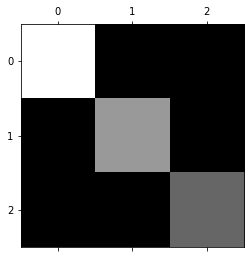

In [9]:
#If you have many variables, it makes sense to plot the confusion matrix:
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()


In [10]:
#Calculated probabilities
#get the probabilities of the predicted classes
probability = log_reg.predict_proba(testX)
probability

array([[9.70108009e-01, 2.98918873e-02, 1.03811532e-07],
       [9.83473267e-01, 1.65266845e-02, 4.86512926e-08],
       [9.07538251e-03, 8.40019921e-01, 1.50904697e-01],
       [9.82785069e-01, 1.72149232e-02, 8.02231717e-09],
       [6.77859403e-06, 2.11598741e-02, 9.78833347e-01],
       [9.86429807e-01, 1.35701650e-02, 2.79365471e-08],
       [1.05208916e-02, 9.24567533e-01, 6.49115757e-02],
       [6.92683035e-03, 7.97915752e-01, 1.95157418e-01],
       [9.94478367e-01, 5.52162940e-03, 3.70705190e-09],
       [1.27006062e-06, 2.17815701e-02, 9.78217160e-01],
       [3.01179255e-02, 9.48828907e-01, 2.10531677e-02],
       [9.84351511e-01, 1.56484742e-02, 1.48023159e-08],
       [9.63363553e-01, 3.66363719e-02, 7.51209596e-08],
       [7.23328355e-05, 4.58375558e-02, 9.54090111e-01],
       [5.89693107e-03, 8.11799581e-01, 1.82303488e-01],
       [9.80585905e-01, 1.94140601e-02, 3.44447743e-08],
       [1.71409819e-01, 8.24432279e-01, 4.15790200e-03],
       [2.51438227e-02, 9.24628

In [11]:
#Each column here represents a class. The class with the highest probability is the output of the predicted class. Here we can see that the length of the probability data is the same as the length of the test data.

print(probability.shape[0])
print(testX.shape[0])

30
30


In [12]:
#output into shape and a readable format

df = pd.DataFrame(log_reg.predict_proba(testX), columns=log_reg.classes_)
df.head()

#with the .classes_ function we get the order of the classes that Python gave.


,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.970108,0.029892,0.000000
1,0.983473,0.016527,0.000000
2,0.009075,0.840020,0.150905
3,0.982785,0.017215,0.000000
4,0.000007,0.021160,0.978833


In [13]:
#sum of the probabilities must always be 1

df['sum'] = df.sum(axis=1)
df.head()


,Iris-setosa,Iris-versicolor,Iris-virginica,sum
0,0.970108,0.029892,0.000000,1.000000
1,0.983473,0.016527,0.000000,1.000000
2,0.009075,0.840020,0.150905,1.000000
3,0.982785,0.017215,0.000000,1.000000
4,0.000007,0.021160,0.978833,1.000000


In [14]:
# add the predicted classes…

df['predicted_class'] = y_pred
df.head()


,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class
0,0.970108,0.029892,0.000000,1.000000,Iris-setosa
1,0.983473,0.016527,0.000000,1.000000,Iris-setosa
2,0.009075,0.840020,0.150905,1.000000,Iris-versicolor
3,0.982785,0.017215,0.000000,1.000000,Iris-setosa
4,0.000007,0.021160,0.978833,1.000000,Iris-virginica


In [15]:
#actual classes:

df['actual_class'] = testY.to_frame().reset_index().drop(columns='index')
df.head()


,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class
0,0.970108,0.029892,0.000000,1.000000,Iris-setosa,Iris-setosa
1,0.983473,0.016527,0.000000,1.000000,Iris-setosa,Iris-setosa
2,0.009075,0.840020,0.150905,1.000000,Iris-versicolor,Iris-versicolor
3,0.982785,0.017215,0.000000,1.000000,Iris-setosa,Iris-setosa
4,0.000007,0.021160,0.978833,1.000000,Iris-virginica,Iris-virginica


In [16]:
#do a plausibility check whether the classes were predicted correctly.

le = preprocessing.LabelEncoder()
df['label_pred'] = le.fit_transform(df['predicted_class'])
df['label_actual'] = le.fit_transform(df['actual_class'])
df.head()


,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class,label_pred,label_actual
0,0.970108,0.029892,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0
1,0.983473,0.016527,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0
2,0.009075,0.840020,0.150905,1.000000,Iris-versicolor,Iris-versicolor,1,1
3,0.982785,0.017215,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0
4,0.000007,0.021160,0.978833,1.000000,Iris-virginica,Iris-virginica,2,2


In [17]:
#see that the two variables (predicted_class & actual_class) were coded the same and can therefore be continued properly.


In [18]:
targets = df['predicted_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [19]:
targets = df['actual_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping


{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [20]:
#plausibility check whether the classes were predicted correctly. If the result of subtraction is 0, it was a correct estimate of the model.


In [21]:
df['check'] = df['label_actual'] - df['label_pred']
df.head(7)


,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class,label_pred,label_actual,check
0,0.970108,0.029892,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0,0
1,0.983473,0.016527,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0,0
2,0.009075,0.840020,0.150905,1.000000,Iris-versicolor,Iris-versicolor,1,1,0
3,0.982785,0.017215,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0,0
4,0.000007,0.021160,0.978833,1.000000,Iris-virginica,Iris-virginica,2,2,0
5,0.986430,0.013570,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0,0
6,0.010521,0.924568,0.064912,1.000000,Iris-versicolor,Iris-versicolor,1,1,0


In [22]:
#For better orientation, we give the observations descriptive names and delete unnecessary columns.

df['correct_prediction?'] = np.where(df['check'] == 0, 'True', 'False')
df = df.drop(['label_pred', 'label_actual', 'check'], axis=1)
df.head()


,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class,correct_prediction?
0,0.970108,0.029892,0.000000,1.000000,Iris-setosa,Iris-setosa,True
1,0.983473,0.016527,0.000000,1.000000,Iris-setosa,Iris-setosa,True
2,0.009075,0.840020,0.150905,1.000000,Iris-versicolor,Iris-versicolor,True
3,0.982785,0.017215,0.000000,1.000000,Iris-setosa,Iris-setosa,True
4,0.000007,0.021160,0.978833,1.000000,Iris-virginica,Iris-virginica,True


In [23]:
 #use the generated “values” to manually calculate the accuracy again.
    
true_predictions = df[(df["correct_prediction?"] == 'True')].shape[0]
false_predictions = df[(df["correct_prediction?"] == 'False')].shape[0]
total = df["correct_prediction?"].shape[0]
print('manual calculated Accuracy is:', (true_predictions / total * 100))

manual calculated Accuracy is: 100.0


In [24]:
#take finally a look at the probabilities of the mispredicted classes
wrong_pred = df[(df["correct_prediction?"] == 'False')]
wrong_pred


,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class,correct_prediction?


In [25]:
#Multinomial Logit with the statsmodel library
#To get the p-values of the model created above we have to use the statsmodel library again.

x = iris.drop('species', axis=1)
y = iris['species']
x = sm.add_constant(x, prepend = False)
mnlogit_mod = sm.MNLogit(y, x)
mnlogit_fit = mnlogit_mod.fit()
print (mnlogit_fit.summary())


         Current function value: 0.039662
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Fri, 27 May 2022   Pseudo R-squ.:                  0.9639
Time:                        16:39:31   Log-Likelihood:                -5.9493
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 7.055e-64
species=Iris-versicolor       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
sepal_length               -0.4880   2.54e+04  -1.92e-05      1.000   -4.98e+04    4.98e+04
sepal_width               

c:\users\harsh\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
